In [19]:
from dataclasses import dataclass, field
from typing import List, Dict, Optional
import pandas as pd
import numpy as np
import rasterio
import geopandas as gpd
from datetime import datetime
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/michaelfoley/Library/CloudStorage/GoogleDrive-mfoley@g.harvard.edu/My Drive/Subnational_Yield_Database/scripts/global/boundaries_processing')
import relationships
import seaborn as sns

In [20]:
# Essential font settings
plt.rcParams['font.family'] = 'serif'  # Or 'sans-serif' for a cleaner look
plt.rcParams['font.size'] = 12  # Good baseline size
plt.rcParams['axes.titlesize'] = 16  # Larger title
plt.rcParams['axes.labelsize'] = 14  # Slightly larger axis labels
plt.rcParams['xtick.labelsize'] = 12  # Readable tick labels
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Text quality improvements
plt.rcParams['text.antialiased'] = True  # Smoother text
plt.rcParams['axes.formatter.use_mathtext'] = True  # Better formatting for scientific notation

# Title and label spacing
plt.rcParams['axes.titlepad'] = 12  # Space between title and plot
plt.rcParams['axes.labelpad'] = 8  # Space between axis and label

# Figure resolution for clear text
plt.rcParams['figure.figsize'] = (10, 6)  # Good default size
plt.rcParams['figure.dpi'] = 100  # Screen display
plt.rcParams['savefig.dpi'] = 300  # High quality when saving
plt.rcParams['savefig.bbox'] = 'tight'  # Prevents text cutoff

In [21]:
import re

def clean_district_names(df, column_name):
    """
    Removes state abbreviations in parentheses and trims whitespace from district names.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the district names
    column_name : str
        Name of the column containing district names with state abbreviations
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with cleaned district names in the specified column
    """
    # Create a copy to avoid modifying the original DataFrame
    df_cleaned = df.copy()
    
    # Use regex to remove the state abbreviation pattern:
    # - Optional whitespace before parenthesis
    # - Open parenthesis
    # - 2-3 uppercase letters 
    # - Close parenthesis
    # - Optional whitespace after parenthesis
    # - Must be at the end of the string
    df_cleaned[column_name] = df_cleaned[column_name].str.replace(r'\s*\([A-Z]{2,3}\)\s*$', '', regex=True)
    
    # Trim any leading/trailing whitespace
    df_cleaned[column_name] = df_cleaned[column_name].str.strip()
    
    return df_cleaned

In [22]:
def remove_district_suffix(df, column_name):
    """
    Removes the word 'District' from the end of district names and trims whitespace.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the district names
    column_name : str
        Name of the column containing district names with 'District' suffix
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with cleaned district names in the specified column
    """
    # Create a copy to avoid modifying the original DataFrame
    df_cleaned = df.copy()
    
    # Use regex to remove the word 'District' at the end of the name
    # \s+ matches one or more whitespace characters
    # $ ensures the pattern is at the end of the string
    df_cleaned[column_name] = df_cleaned[column_name].str.replace(r'\s+District$', '', regex=True)
    
    # Case insensitive version (if needed)
    # df_cleaned[column_name] = df_cleaned[column_name].str.replace(r'\s+[Dd]istrict$', '', regex=True)
    
    # Trim any remaining whitespace
    df_cleaned[column_name] = df_cleaned[column_name].str.strip()
    
    return df_cleaned

In [23]:
india_relationship = pd.read_csv('../shapefiles/relationshiptable_IN.csv')
india_changes = pd.read_excel('../shapefiles/IN_Relationships_units.xlsx')

# We are first going to make a hybrid boundary from 2016, as there were a ton of changes in 2015. We have lots of data since 2016 so we can make something that covers the last decade first

In [24]:
# Extract the year from the 'from_unit_FNID' column and convert it to an integer
india_changes['year'] = india_changes['from_unit_FNID'].str[2:6].astype(int)

# Filter the rows where the year is 2016 or later
filtered_india_changes = india_changes[india_changes['year'] >= 2016]

# Display the filtered dataframe
print(filtered_india_changes[filtered_india_changes['relationship_type'] == 'Split'])

     relationship_type from_unit_FNID  \
919              Split   IN2017A20334   
920              Split   IN2017A20333   
921              Split   IN2017A20333   
937              Split   IN2018A23153   
938              Split   IN2018A23153   
945              Split   IN2019A23162   
947              Split   IN2016A24524   
948              Split   IN2016A24524   
949              Split   IN2016A24523   
1010             Split   IN2021A22420   
1011             Split   IN2021A22420   
1012             Split   IN2021A24047   
1013             Split   IN2021A24047   

                               from_unit_Name  to_unit_FNID  \
919       Lower Siang (AR), Arunachal Pradesh  IN2018A20340   
920        West Siang (AR), Arunachal Pradesh  IN2018A20341   
921        West Siang (AR), Arunachal Pradesh  IN2018A20342   
937              Kanchipuram (TN), Tamil Nadu  IN2019A23155   
938              Kanchipuram (TN), Tamil Nadu  IN2019A23156   
945                  Ranipet (TN), Tamil Nadu  

In [25]:
sorted(india_changes['year'].unique())

[np.int64(1982),
 np.int64(1983),
 np.int64(1984),
 np.int64(1985),
 np.int64(1986),
 np.int64(1987),
 np.int64(1988),
 np.int64(1989),
 np.int64(1990),
 np.int64(1991),
 np.int64(1992),
 np.int64(1993),
 np.int64(1994),
 np.int64(1995),
 np.int64(1996),
 np.int64(1997),
 np.int64(1998),
 np.int64(1999),
 np.int64(2000),
 np.int64(2001),
 np.int64(2002),
 np.int64(2003),
 np.int64(2004),
 np.int64(2005),
 np.int64(2006),
 np.int64(2007),
 np.int64(2008),
 np.int64(2009),
 np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021),
 np.int64(2022),
 np.int64(2023)]

In [29]:
india_boundaries = gpd.read_file('../shapefiles/India_Official_Boundaries_2021/DISTRICT_BOUNDARY.shp')
india_state_boundaries = gpd.read_file('../shapefiles/India_Official_Boundaries_2021/STATE_BOUNDARY.shp')
geolocet_boundaries = gpd.read_file('../shapefiles/India_Geolocet_2023/India_admin_level_5_geolocet.shp')
#cga_boundaries = gpd.read_file('/Users/michaelfoley/Library/CloudStorage/GoogleDrive-mfoley@g.harvard.edu/My Drive/Subnational_Yield_Database/boundaries/country/IND/CGA_IND_District2021/District Shapefile.shp')
ag_stats = pd.read_csv('../../data/ag_stats_final_071925.csv')

In [30]:
#geolocet_boundaries['name'] = geolocet_boundaries['name'].replace('Charkhi Dadri District', 'Charki Dadri District')

In [31]:
#clean names from data
ag_state_names = ag_stats[ag_stats['Year'] == 2022]['Admin 2'].unique().astype(str)
ag_nostate_stats = clean_district_names(ag_stats, 'Admin 2')
ag_nostate_names = ag_nostate_stats[ag_stats['Year'] == 2022]['Admin 2'].unique().astype(str)

#clean names from Survey of India
india_boundaries = clean_district_names(india_boundaries, 'District')

In [32]:
india_boundaries['District'] = india_boundaries['District'].str.replace('>', 'A')
india_boundaries['District'] = india_boundaries['District'].str.replace('@', 'U')
india_boundaries['District'] = india_boundaries['District'].str.replace('|', 'I')

In [33]:
india_boundaries['STATE'] = india_boundaries['STATE'].str.replace('>', 'A')
india_boundaries['STATE'] = india_boundaries['STATE'].str.replace('@', 'U')
india_boundaries['STATE'] = india_boundaries['STATE'].str.replace('|', 'I')

india_state_boundaries['STATE'] = india_state_boundaries['STATE'].str.replace('>', 'A')
india_state_boundaries['STATE'] = india_state_boundaries['STATE'].str.replace('@', 'U')
india_state_boundaries['STATE'] = india_state_boundaries['STATE'].str.replace('|', 'I')

india_state_boundaries['STATE'] = india_state_boundaries['STATE'].str.replace('CHHAtTISGARH', 'CHHATTISGARH')

In [34]:
survey_names = india_boundaries['District'].str.title()

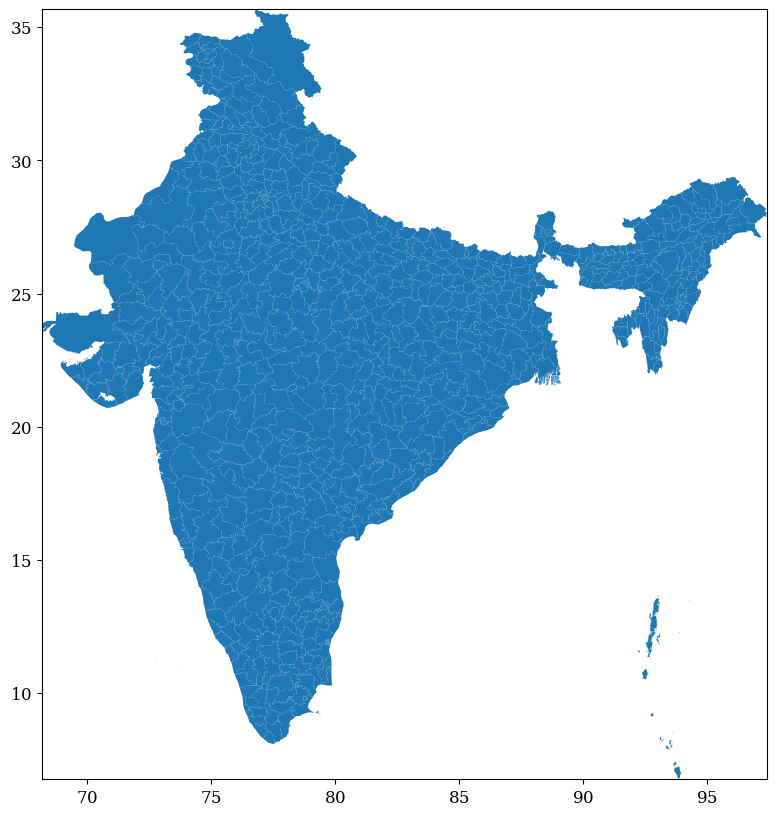

In [35]:
# Define the x and y limits for zooming in
xlim = (min(geolocet_boundaries.geometry.bounds.minx), max(geolocet_boundaries.geometry.bounds.maxx))
ylim = (min(geolocet_boundaries.geometry.bounds.miny), max(geolocet_boundaries.geometry.bounds.maxy))

# Plot with zoom
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
geolocet_boundaries.plot(ax=ax)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

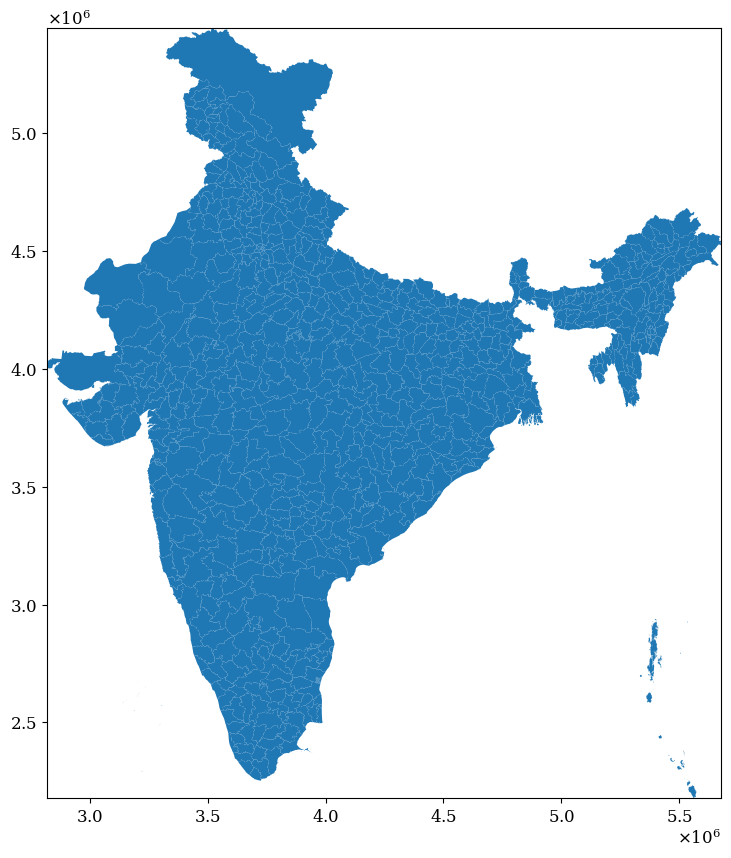

In [36]:
# Define the x and y limits for zooming in
xlim = (min(india_boundaries.geometry.bounds.minx), max(india_boundaries.geometry.bounds.maxx))
ylim = (min(india_boundaries.geometry.bounds.miny), max(india_boundaries.geometry.bounds.maxy))

# Plot with zoom
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
india_boundaries.plot(ax=ax)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

# First we match the districts in the geolocet boundaries to their appropriate states

In [37]:
# Ensure both layers use the same CRS
india_state_boundaries = india_state_boundaries.to_crs(geolocet_boundaries.crs)

In [38]:
geolocet_boundaries

,id,admin_leve,boundary,name,name_ar,name_az-Ar,name_azb,name_be,name_de,name_fa,...,name_ia,name_io,name_kk-Ar,wikipedi_9,wikipedi10,long_nam_2,sorting_na,long_nam_3,long_nam_4,geometry
0,726993,5,administrative,Lahaul and Spiti District,None,None,None,None,Lahaul und Spiti,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((76.3713 32.80479, 76.3718 32.81253, ..."
1,728093,5,administrative,Kinnaur District,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((77.74825 31.71353, 77.75089 31.71643..."
2,728111,5,administrative,Kullu District,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((76.93577 32.09072, 76.9358 32.09486,..."
3,728141,5,administrative,Chamba District,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((75.79671 32.88423, 75.79928 32.88556..."
4,728149,5,administrative,Kangra District,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((75.59401 32.07734, 75.5954 32.08443,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,33404717,5,administrative,Maihar District,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((80.3545 23.97154, 80.35462 23...."
782,33404771,5,administrative,Pandhurna District,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((78.34275 21.58905, 78.34276 21.58905..."
783,33408359,5,administrative,Bajali District,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((90.99139 26.51866, 90.99152 26.52308..."
784,576960254,5,administrative,Security Men Path Way,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((83.03428 24.21376, 83.03431 24.21411..."


In [39]:
# Compute the spatial intersection between districts and states
intersections = gpd.overlay(geolocet_boundaries, india_state_boundaries, how="intersection")

# Calculate the area of each intersection
intersections["intersect_area"] = intersections.geometry.area

# Assuming 'district_id' uniquely identifies districts and 'state_name' exists in states
# For each district, select the state with the maximum intersection area
max_overlap = (intersections.sort_values("intersect_area", ascending=False)
                              .groupby("id")
                              .first()
                              .reset_index())

# Merge the state assignment back into the original district data
districts_with_state = geolocet_boundaries.merge(max_overlap[["id", "STATE"]],
                                       on="id", how="left")

/var/folders/16/y9h7_0ld1418y9zts1sf_3xh0000gn/T/ipykernel_16408/1334101184.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersections["intersect_area"] = intersections.geometry.area


In [40]:
hybrid = districts_with_state[['id', 'boundary', 'name', 'wikidata', 'wikipedia', 'geometry', 'STATE']]

In [41]:
#Fix geolocet names
hybrid = remove_district_suffix(hybrid, 'name')
hybrid_names = geolocet_boundaries['name']

In [42]:
states = hybrid['STATE'].unique().astype(str)
states.sort()
print(states)


['ANDAMAN & NICOBAR' 'ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR'
 'CHANDIGARH' 'CHHATTISGARH' 'DADRA & NAGAR HAVELI & DAMAN & DIU' 'DELHI'
 'GOA' 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU AND KASHMIR'
 'JHARKHAND' 'KARNATAKA' 'KERALA' 'LADAKH' 'LAKSHADWEEP' 'MADHYA PRADESH'
 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA' 'MIZORAM' 'NAGALAND' 'ODISHA'
 'PUDUCHERRY' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU' 'TELANGANA'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL']


# Now we apply the state abbreviation to the districts

In [43]:
# State abbreviation mapping
state_abbr = {
    "ANDAMAN & NICOBAR": "AN",
    "ANDHRA PRADESH": "AP",
    "ARUNACHAL PRADESH": "AR",
    "ASSAM": "AS",
    "BIHAR": "BR",
    "CHANDIGARH": "CH",
    "CHHATTISGARH": "CG",  # Note: sometimes “CT” is used
    "DADRA & NAGAR HAVELI & DAMAN & DIU": "DN",  # For the merged UT
    "DELHI": "DL",
    "GOA": "GA",
    "GUJARAT": "GJ",
    "HARYANA": "HR",
    "HIMACHAL PRADESH": "HP",
    "JAMMU AND KASHMIR": "JK",
    "JHARKHAND": "JH",
    "KARNATAKA": "KA",
    "KERALA": "KL",
    "LADAKH": "LA",
    "LAKSHADWEEP": "LK",
    "MADHYA PRADESH": "MP",
    "MAHARASHTRA": "MH",
    "MANIPUR": "MN",
    "MEGHALAYA": "ML",
    "MIZORAM": "MZ",
    "NAGALAND": "NL",
    "ODISHA": "OD",  # based on the traditional abbreviation from Orissa
    "PUDUCHERRY": "PY",
    "PUNJAB": "PB",
    "RAJASTHAN": "RJ",
    "SIKKIM": "SK",
    "TAMIL NADU": "TN",
    "TELANGANA": "TG",
    "TRIPURA": "TR",
    "UTTAR PRADESH": "UP",
    "UTTARAKHAND": "UK",
    "WEST BENGAL": "WB"
}

In [44]:
# Append the two-letter abbreviation in parentheses after each district name
hybrid["name_state"] = hybrid.apply(
    lambda row: f"{row['name']} ({state_abbr.get(row['STATE'], '')})", axis=1
)

In [45]:
hybrid_names = hybrid['name_state'].unique()

In [46]:
hybrid[['name', 'STATE', 'name_state']]

,name,STATE,name_state
0,Lahaul and Spiti,HIMACHAL PRADESH,Lahaul and Spiti (HP)
1,Kinnaur,HIMACHAL PRADESH,Kinnaur (HP)
2,Kullu,HIMACHAL PRADESH,Kullu (HP)
3,Chamba,HIMACHAL PRADESH,Chamba (HP)
4,Kangra,HIMACHAL PRADESH,Kangra (HP)
...,...,...,...
781,Maihar,MADHYA PRADESH,Maihar (MP)
782,Pandhurna,MADHYA PRADESH,Pandhurna (MP)
783,Bajali,ASSAM,Bajali (AS)
784,Security Men Path Way,UTTAR PRADESH,Security Men Path Way (UP)


# Now we find names in either file that don't exist in the other

In [47]:
len(ag_stats[ag_stats['Year'] == 2022]['Admin 2'].unique())

738

In [48]:
np.sort(survey_names)

array(['Adilabad', 'Agar Malwa', 'Agra', 'Ahamadnagar', 'Ahmadabad',
       'Aizawl', 'Ajmer', 'Akola', 'Alappuzha', 'Aligarh', 'Alipur Duar',
       'Alirajpur', 'Almora', 'Alwar', 'Amaravati', 'Ambala',
       'Ambedkarnagar', 'Amethi', 'Amreli', 'Amritsar', 'Amroha', 'Anand',
       'Anantapur', 'Anantnag', 'Anjaw', 'Anugul', 'Anuppur', 'Araria',
       'Aravalli', 'Ariyalur', 'Arwal', 'Ashoknagar', 'Auraiya',
       'Aurangabad', 'Aurangabad', 'Ayodhya', 'Azamgarh', 'Badgam',
       'Bagalkot', 'Bageshwar', 'Baghpat', 'Bahraich', 'Baksa',
       'Balaghat', 'Balasore (Baleshwar)', 'Ballari', 'Ballia', 'Balod',
       'Baloda Bazar', 'Balrampur', 'Balrampur', 'Banas Kantha', 'Banda',
       'Bandipura', 'Banka', 'Bankura', 'Banswara', 'Barabanki',
       'Baragarh', 'Baramula', 'Baran', 'Bareilly', 'Barmer', 'Barnala',
       'Barpeta', 'Barwani', 'Bastar', 'Basti', 'Bathinda',
       'Baudh (Bauda)', 'Begusarai', 'Belagavi', 'Bemetara',
       'Bengaluru Rural', 'Bengaluru Urban', 

In [49]:
import difflib
from difflib import get_close_matches
def find_district_name_differences(array1, array2):
    """
    Find differences between two arrays of district names and suggest reconciliations.
    
    Parameters:
    -----------
    array1, array2 : arrays
        Arrays containing district names to compare
    
    Returns:
    --------
    pd.DataFrame
        DataFrame showing name differences and suggested matches
    """
    
    # Convert to sets for efficient comparison
    set1 = set(name for name in array1 if not pd.isna(name))
    set2 = set(name for name in array2 if not pd.isna(name))
    
    # Find names in array1 that aren't in array2
    only_in_array1 = set1 - set2
    
    # Find names in array2 that aren't in array1
    only_in_array2 = set2 - set1
    
    # Find potential matches using fuzzy matching
    matches = []
    for name1 in only_in_array1:
        close_matches = get_close_matches(name1, only_in_array2, n=1, cutoff=0.6)
        if close_matches:
            matches.append({
                'name_in_array1': name1,
                'potential_match_in_array2': close_matches[0],
                'similarity': difflib.SequenceMatcher(None, name1, close_matches[0]).ratio()
            })
        else:
            matches.append({
                'name_in_array1': name1,
                'potential_match_in_array2': None,
                'similarity': None
            })
    
    # For names in array2 without matches in the previous step
    matched_names_array2 = {match['potential_match_in_array2'] for match in matches if match['potential_match_in_array2']}
    for name2 in only_in_array2 - matched_names_array2:
        close_matches = get_close_matches(name2, only_in_array1, n=1, cutoff=0.6)
        if close_matches:
            matches.append({
                'name_in_array1': close_matches[0],
                'potential_match_in_array2': name2,
                'similarity': difflib.SequenceMatcher(None, close_matches[0], name2).ratio()
            })
        else:
            matches.append({
                'name_in_array1': None,
                'potential_match_in_array2': name2,
                'similarity': None
            })
    
    # Create DataFrame from matches
    matches_df = pd.DataFrame(matches)
    
    # Sort by similarity (descending)
    if not matches_df.empty:
        matches_df = matches_df.sort_values(by='similarity', ascending=False, na_position='last')
    
    return matches_df

# Ok we first need to identify any changes that happened since 2016 - By State

# Haryana
    - 2016: Mewat -> Nuh
    - 2016: Bhiwani / Bhiwani, Charki Dadri

# Manipur
    - 2016: Chandel / Chandel, Tengnoupal
    - 2016: Churachandpur / Churachandpur, Pherzawl
    - 2016: Tamenglong / Tamenglong, Noney
    - 2016: Imphal East / Imphal East, Jiribam
    - 2016: Thoubal / Thoubal, Kakching
    - 2016: Ukhrul / Ukhrul, Kamjong
    - 2016: Senapati / Senapati, Kangpokpi

# Mizoram
    - 2019: Champhai, Aizawl / Champhai, Saitual, Khawzawl, Aizawl

# Telangana
    - 2016: Adilabad / Adilabad, Kumuram Bheem Asifabad, Nirmal, Mancherial
    - 2016: Karimnagar / Karimnagar, Peddapalli, Rajanna Sircilla, Jagtial, Siddipet
    - 2016: Warangal / Warangal Rural, Warangal Urban, Jangaon, Mahabubabad, Jayashankar Bhupalpally
    - 2016: Mahbubnagar, Ranga Reddy / Mahbubnagar, Jogulamba Gadwal, Wanaparthy, Nagarkurnool, Vikarabad, Ranga Reddy (Mahbubnagar and Ranga Reddy only for Vikarabad)
    - 2016: Medak / Medak, Sangareddy
    - 2016: Khammam / Khammam, Bhadradri Kothagudem
    - 2016: Nalgonda / Nalgonda, Suryapet, Yadadri Bhuvanagiri
    - 2016: Nizamabad / Nizamabad, Kamareddy
    - 2016: Hyderabad / Hyderabad, Medchal-Malkajgiri 
    - 2019: Mahbubnagar / Mahbubnagar, Narayanpet
    - 2019: Jayashankar Bhupalpally / Jayashankar Bhupalpally, Mulugu
    - 2021: Warangal Urban -> Hanamkonda

# Arunachal Pradesh
    - 2017: Lower Subansiri / Lower Subansiri, Kamle
    - 2017: East Siang, West Siang / East Siang, West Siang, Lower Siang
    - 2018: East Kameng / East Kameng, Pakke Kesang
    - 2018: West Siang / West Siang, Shi Yomi

# West Bengal
    - 2017: Paschim Medinipur / Paschim Medinipur, Jhargram
    - 2017: Bardhaman / Paschim Bardhaman, Purba Bardhaman
    - 2017: Darjeeling / Darjeeling, Kalimpong

# Tamil Nadu
    - 2018: Chennai / Chennai (?)
    - 2018: Kanchipuram / Kanchipuram (?)
    - 2018: Tiruvallur / Tiruvallur (?)
    - 2019: Villupuram / Villupuram, Kallakurichi
    - 2019: Tirunelveli / Tirunelveli, Tenkasi
    - 2019: Vellore, Ranipet / Vellore, Ranipet, Tirupattur
    - 2019: Kanchipuram / Kanchipuram, Chengalpattu

# Madhya Pradesh
    - 2018: Tikamgarh / Tikamgarh, Niwari

# Uttar Pradesh
    - 2018: Faizabad -> Ayodhya

# Jammu and Kashmir/Ladakh
    - 2019: Jammu and Kashmir / Jammu and Kashmir / Ladakh
    - 2019: Kargil (JK) -> Kargil (LA)
    - 2019: Leh (JK) -> Leh (LA) (? registered as split)

# Jammu and Kashmir
    - 2019: all the ones in Kashmir say they split? Is that because of Admin 1 change?

# Dadra and Nagar Haveli/Daman and Diu
    - 2020: Dadra and Nagar Haveli + Daman and Diu: Dadra and Nagar Haveli and Daman and Diu
    - 2020: Dadra and Nagar Haveli (DH) -> Dadra and Nagar Haveli (DN ? typo in table)
    - 2020: Daman (DD) -> Daman (DN)
    - 2020: Diu (DD) -> Diu

# Assam
    - 2020: Barpeta / Barpeta, Bajali
    - 2022: Baksa / Baksa, Tamulpur

# Karnataka
    - 2020: Ballari / Ballari, Vijayanagara

# Tamil Nadu
    - 2020: Nagapattinam / Nagapattinam, Mayiladuthurai

# Chattisgarh
    - 2020: Bilaspur / Bilaspur, Gaurella-Pednra-Marwahi
    - 2021: Janjgir-Champa / Janjgir-Champa, Shakti
    - 2021: Koriya / Koriya, Manendragarh
    - 2021: Raigarh, Baloda Bazar / Raigarh, Sarangarh-Bilaigarh, Baloda Bazar
    - 2022: Rajnandgaon / Rajnandgaon, Khairagarh

# Meghalaya
    - 2021: West Khasi Hills / West Khasi Hills, Eastern West Khasi Hills

# Nagaland
    - 2021: Dimapur / Dimapur, Chumoukedima, Niuland
    - 2021: Kohima / Kohima, Tseminyu
    - 2021: Tuensang / Tuensang, Noklak 
    - 2022: Tuensang / Tuensang, Shamator

# Sikkim
    - 2021: North Sikkim -> Mangan
    - 2021: South Sikkim -> Namchi
    - 2021: East Sikkim / Gangtok, Pakyong
    - 2021: West Sikkim / Gyalshing, Soreng

# Andhra Pradesh
    - 2022: Anantapur / Anantapur, Sri Sathya Sai
    - 2022: Visakhapatnam / Visakhapatnam, Alluri Sitharama Raju, Anakapalli
    - 2022: Nellore, Chittoor / Nellore, Chittoor, Tirupati
    - 2022: East Godavari / East Godavari, Kakinada, Konaseema
    - 2022: Guntur, Prakasam / Guntur, Bapatla, Palnadu, Prakasam
    - 2022: Krishna / Krishna, NT Rama Rao
    - 2022: Kurnool / Kurnool, Nandyal
    - 2022: Vizianagaram, Srikakulam / Vizianagaram, Parvathipuram Manyam, Srikakulam
    - 2022: West Godavari / West Godavari, Eluru
    - 2022: YSR Kadapa, Chittoor / YSR Kadapa, Annamayya, Chittoor

# Rajasthan
    - 2023: Sawai Madhopur / Sarai Madhopur, Gangapur


# Great - now I must find out which districts have names that do not fall in either the data or the relationship table to make sure I don't miss anything

In [50]:
#differences_with_survey = find_district_name_differences(ag_nostate_names, survey_names)
differences_with_geolocet = find_district_name_differences(ag_state_names, hybrid_names)

In [51]:
filtered_india_changes

,relationship_type,from_unit_FNID,from_unit_Name,to_unit_FNID,to_unit_Name,State,U_ID,year
919,Split,IN2017A20334,"Lower Siang (AR), Arunachal Pradesh",IN2018A20340,"Lepa Rada (AR), Arunachal Pradesh",AR,0334,2017
920,Split,IN2017A20333,"West Siang (AR), Arunachal Pradesh",IN2018A20341,"West Siang (AR), Arunachal Pradesh",AR,0333,2017
921,Split,IN2017A20333,"West Siang (AR), Arunachal Pradesh",IN2018A20342,"Shi Yomi (AR), Arunachal Pradesh",AR,0333,2017
937,Split,IN2018A23153,"Kanchipuram (TN), Tamil Nadu",IN2019A23155,"Kanchipuram (TN), Tamil Nadu",TN,3153,2018
938,Split,IN2018A23153,"Kanchipuram (TN), Tamil Nadu",IN2019A23156,"Chengalpattu (TN), Tamil Nadu",TN,3153,2018
...,...,...,...,...,...,...,...,...
1840,Successor,IN2022A24433,"West Godavari (AP), Andhra Pradesh",NaN,NaN,AP,4433,2022
1844,Successor,IN2021A22218,"West Khasi Hills (ML), Meghalaya",NaN,NaN,ML,2218,2021
1845,Successor,IN2018A20341,"West Siang (AR), Arunachal Pradesh",NaN,NaN,AR,0341,2018
1848,Successor,IN2016A24535,"Yadadri Bhuvanagiri (TG), Telangana",NaN,NaN,TG,4535,2016


In [52]:
new_relationship_names = india_changes['to_unit_Name'].str.split(',').str[0].str.strip().unique()
existing_relationship_names = india_changes['from_unit_Name'].str.split(',').str[0].str.strip().unique()

all_relationship_names = set(new_relationship_names).union(existing_relationship_names)

In [53]:
all_relationship_names

{'Adilabad (AP)',
 'Adilabad (TG)',
 'Agar Malwa (MP)',
 'Agra (UP)',
 'Ahmedabad (GJ)',
 'Ahmednagar (MH)',
 'Aizawl (MZ)',
 'Ajmer (RJ)',
 'Akola (MH)',
 'Alappuzha (KL)',
 'Aligarh (UP)',
 'Alipurduar (WB)',
 'Alirajpur (MP)',
 'Alleppey (KL)',
 'Alluri Sitharama Raju (AP)',
 'Almora (UK)',
 'Almora (UP)',
 'Almora (UR)',
 'Alwar (RJ)',
 'Ambala (HR)',
 'Ambedkar Nagar (UP)',
 'Amethi (UP)',
 'Amravati (MH)',
 'Amreli (GJ)',
 'Amritsar (PB)',
 'Amroha (UP)',
 'Anakapalli (AP)',
 'Anand (GJ)',
 'Anantapur (AP)',
 'Anantnag (JK)',
 'Andaman (AN)',
 'Andaman and Nicobar',
 'Andhra Pradesh',
 'Angul (OD)',
 'Angul (OR)',
 'Anjaw (AR)',
 'Annamayya (AP)',
 'Anuppur (MP)',
 'Araria (BR)',
 'Aravalli (GJ)',
 'Ariyalur (TN)',
 'Arunachal Pradesh',
 'Arwal (BR)',
 'Ashoknagar (MP)',
 'Assam',
 'Auraiya (UP)',
 'Aurangabad (BR)',
 'Aurangabad (MH)',
 'Ayodhya (UP)',
 'Azamgarh (UP)',
 'Bagalkot (KA)',
 'Bageshwar (UK)',
 'Bageshwar (UP)',
 'Bageshwar (UR)',
 'Bagpat (UP)',
 'Bahraich (UP)',
 

In [54]:
# Apply split and strip to each element in relationship_names to remove state abbreviations
relationship_nostate_names = np.unique(np.array([s.split('(')[0].strip() if isinstance(s, str) else s for s in all_relationship_names]))

In [55]:
len(relationship_nostate_names)

846

In [56]:
ag_state_names

array(['Alluri Sitharama Raju (AP)', 'YSR Kadapa (AP)', 'Kurnool (AP)',
       'Nandyal (AP)', 'Palnadu (AP)', 'Parvathipuram Manyam (AP)',
       'Prakasam (AP)', 'Nellore (AP)', 'Sri Sathya Sai (AP)',
       'Srikakulam (AP)', 'Anakapalli (AP)', 'Tirupati (AP)',
       'Visakhapatnam (AP)', 'Vizianagaram (AP)', 'Anantapur (AP)',
       'Annamayya (AP)', 'Bapatla (AP)', 'Chittoor (AP)', 'Eluru (AP)',
       'Ahmedabad (GJ)', 'Dangs (GJ)', 'Devbhumi Dwarka (GJ)',
       'Dahod (GJ)', 'Gandhinagar (GJ)', 'Gir Somnath (GJ)',
       'Jamnagar (GJ)', 'Junagadh (GJ)', 'Kachchh (GJ)', 'Kheda (GJ)',
       'Mahesana (GJ)', 'Amreli (GJ)', 'Mahisagar (GJ)', 'Morbi (GJ)',
       'Narmada (GJ)', 'Navsari (GJ)', 'Panchmahal (GJ)', 'Patan (GJ)',
       'Porbandar (GJ)', 'Rajkot (GJ)', 'Sabarkantha (GJ)', 'Surat (GJ)',
       'Anand (GJ)', 'Surendranagar (GJ)', 'Tapi (GJ)', 'Vadodara (GJ)',
       'Valsad (GJ)', 'Aravalli (GJ)', 'Banaskantha (GJ)', 'Bharuch (GJ)',
       'Bhavnagar (GJ)', 'Botad (GJ

In [57]:
differences_with_relationship = find_district_name_differences(ag_state_names, all_relationship_names)

In [58]:
differences_relationship_geolocet = find_district_name_differences(all_relationship_names, hybrid['name_state'])

In [59]:
differences_relationship_geolocet

,name_in_array1,potential_match_in_array2,similarity
266,Jayashankar Bhupalpally (TG),Jayashankar Bhupalapally (TG),0.982456
53,Gaurella-Pendra-Marwahi (CG),Gaurela-Pendra-Marwahi (CG),0.981818
257,Devbhumi Dwarka (GJ),Devbhumi Dwaraka (GJ),0.975610
95,Jagatsinghpur (OD),Jagatsinghapur (OD),0.972973
255,South Andamans (AN),South Andaman (AN),0.972973
...,...,...,...
272,None,Didwalna-Kuchaman (RJ),NaN
274,None,Kotputli-Behror (RJ),NaN
276,None,Jodhpur(Rural) (RJ),NaN
277,None,Security Men Path Way (UP),NaN


# Create a name mapping for the boundaries

# Notes on changes
    - Dr. B. R. Ambedkhar Konaseema -> Konaseema
    - Khairagarh-Chhuikhadan-Gandai -> Khairagarh
    - Kanniyakumari -> Kanyakumari
    - Tumakuru -> Tumkur
    - Nicobar -> Nicobars
    - Thrivananthapuram
    - Uttar Bastar Kanker -> Kanker
    - Cooch Behar -> Koch Bihar
    - Dharashiv -> Osmanabad
    - Mahé -> Mahe
    - Chhatrapati Sambhajinagar -> Aurangabad (MH)
    - Zünheboto -> Zunheboto
    - YSR -> YSR Kadapa
    - Manendragarh-Chirimiri-Bharatpur -> Manendragarh
    - Ajmer / Ajmer & Didwalna-Kuchaman (?)
    - Sri Potti Sriramulu Nellore -> Nellore
    - Dang -> Dangs
    - NTR -> NT Rama Rao
    - Security Men Path Way - delete
    - Kutch -> Kachchh
    - Baleshwar -> Balasore
    - East Singhbhum -> Purba Singhbhum
    - East Champaran -> Purba Champaran
    - West Singhbhum -> Paschim Singhbhum
    - West Champaran -> Paschim Champaran
    - Sharavasti -> Shravasti
    - South 24 Parganas -> South Twenty-Four Paraganas
    - North 24 Parganas -> North Twenty-Four Paraganas
    - Bagalkote -> Bagalkot
    - Baduan -> Budaun
    - Maharajgang -> Mahrajganj
    - Mysore -> Mysuru
    - Maldah -> Malda
    - Gurugram -> Gurgaon
    - Tamulpur District -> Tamulpur
    - Narmadapuram -> Hoshangabad
    - Mahabubnagar -> Mahbubnagar
    - Kamrup District -> Kamrup Rural
    - Mohla-Manpur-Ambagarh Chowki -> Mohla-Manpur
    - Kodarma -> Koderma
    - Sant Ravidas Nagar -> Bhadohi
    - Chikkamagaluru -> Chikmagalur
    - Nabarangapur -> Nabarangpur
    - Viluppuram -> Villupuram
    - Vijayapura -> Bijapur
    

In [60]:
sorted(hybrid['name_state'].unique())

['Adilabad (TG)',
 'Agar Malwa (MP)',
 'Agra (UP)',
 'Ahmedabad (GJ)',
 'Ahmednagar (MH)',
 'Aizwal (MZ)',
 'Ajmer (RJ)',
 'Akola (MH)',
 'Alappuzha (KL)',
 'Aligarh (UP)',
 'Alipurduar (WB)',
 'Alirajpur (MP)',
 'Alluri Sitharama Raju (AP)',
 'Almora (UK)',
 'Alwar (RJ)',
 'Ambala (HR)',
 'Ambedkar Nagar (UP)',
 'Amethi (UP)',
 'Amravati (MH)',
 'Amreli (GJ)',
 'Amritsar (PB)',
 'Amroha (UP)',
 'Anakapalli (AP)',
 'Anand (GJ)',
 'Anantapur (AP)',
 'Anantnag (JK)',
 'Angul (OD)',
 'Anjaw (AR)',
 'Annamayya (AP)',
 'Anupgarh (RJ)',
 'Anuppur (MP)',
 'Araria (BR)',
 'Aravalli (GJ)',
 'Ariyalur (TN)',
 'Arwal (BR)',
 'Ashoknagar (MP)',
 'Auraiya (UP)',
 'Aurangabad (BR)',
 'Ayodhya (UP)',
 'Azamgarh (UP)',
 'Badaun (UP)',
 'Bagalkote (KA)',
 'Bageshwar (UK)',
 'Baghpat (UP)',
 'Bahraich (UP)',
 'Bajali (AS)',
 'Baksa (AS)',
 'Balaghat (MP)',
 'Balangir (OD)',
 'Baleshwar (OD)',
 'Ballari (KA)',
 'Ballia (UP)',
 'Balod (CG)',
 'Baloda Bazar (CG)',
 'Balotra (RJ)',
 'Balrampur (CG)',
 'Balr

In [61]:
district_mapping = {
    'Dr. B. R. Ambedkhar Konaseema': 'Konaseema',
    'Khairagarh-Chhuikhadan-Gandai': 'Khairagarh',
    'Kanniyakumari': 'Kanyakumari',
    'Tumakuru': 'Tumkur',
    'Nicobar': 'Nicobars',
    'Thrivananthapuram': 'Thrivananthapuram',  # No mapping provided, keeping as is
    'Uttar Bastar Kanker': 'Kanker',
    'Cooch Behar': 'Koch Bihar',
    'Dharashiv': 'Osmanabad',
    'Mahé': 'Mahe',
    'Chhatrapati Sambhajinagar': 'Aurangabad (MH)',
    'Zünheboto': 'Zunheboto',
    'YSR': 'YSR Kadapa',
    'Manendragarh-Chirimiri-Bharatpur': 'Manendragarh',
    'Ajmer': 'Ajmer',  # Unclear mapping, keeping original
    'Ajmer & Didwalna-Kuchaman': 'Ajmer',  # Assuming this maps to Ajmer
    'Sri Potti Sriramulu Nellore': 'Nellore',
    'Dang': 'Dangs',
    'NTR': 'NT Rama Rao',
    'Security Men Path Way': None,  # To be deleted
    'Kutch': 'Kachchh',
    'Baleshwar': 'Balasore',
    'East Singhbhum': 'Purba Singhbhum',
    'East Champaran': 'Purba Champaran',
    'West Singhbhum': 'Paschim Singhbhum',
    'West Champaran': 'Paschim Champaran',
    'Sharavasti': 'Shravasti',
    'South 24 Parganas': 'South Twenty-Four Paraganas',
    'North 24 Parganas': 'North Twenty-Four Paraganas',
    'Bagalkote': 'Bagalkot',
    'Baduan': 'Budaun',
    'Mahrajgang': 'Maharajganj',
    'Mysuru': 'Mysore',
    'Maldah': 'Malda',
    'Gurugram': 'Gurgaon',
    'Tamulpur district': 'Tamulpur',
    'Narmadapuram': 'Hoshangabad',
    'Mahabubnagar': 'Mahbubnagar',
    'Kamrup District': 'Kamrup Rural',
    'Mohla-Manpur-Ambagarh Chowki': 'Mohla-Manpur',
    'Kodarma': 'Koderma',
    'Sant Ravidas Nagar': 'Bhadohi',
    'Chikkamagaluru': 'Chikmagalur',
    'Nabarangapur': 'Nabarangpur',
    'Viluppuram': 'Villupuram',
    'Vijayapura': 'Bijapur'
}

In [62]:
# Add the new mappings (from column 3 to column 2)
new_mappings = {
    #Old name: New name
    'Jayashankar Bhupalapally': 'Jayashankar Bhupalpally',
    'Gaurela-Pendra-Marwahi': 'Gaurella-Pendra-Marwahi',
    'Devbhumi Dwaraka': 'Devbhumi Dwarka',
    'Jagatsinghapur': 'Jagatsinghpur',
    'South Andaman': 'South Andamans',
    'Charki Dadri': 'Charkhi Dadri',
    'Thiruvallur': 'Tiruvallur',
    'Mahrajganj': 'Maharajganj', 
    'Seraikela-Kharsawan': 'Seraikela Kharsawan',
    'Sivagangai': 'Sivaganga',
    'Medchal–Malkajgiri': 'Medchal-Malkajgiri',
    'Kasaragod': 'Kasargod',
    'Baramulla': 'Baramula',
    'Shaheed Bhagat Singh Nagar': 'Shahid Bhagat Singh Nagar',
    'Baghpat': 'Bagpat',
    'Uttara Kannada': 'Uttar Kannad',
    'Chümoukedima': 'Chumoukedima',
    'Sakti': 'Shakti',
    'Muzaffarpur': 'Muzzafarpur',
    'Siddharthnagar': 'Siddharth Nagar',
    'Chikkaballapura': 'Chikballapur',
    'Pakke-Kessang': 'Pakke Kesang',
    'Tseminyü': 'Tseminyu',
    'Rudraprayag': 'Rudra Prayag',
    'Yamunanagar': 'Yamuna Nagar',
    'Hanumakonda': 'Hanamkonda',
    'Yadgir': 'Yadagiri',
    'Barabanki': 'Bara Banki',
    'Badaun': 'Budaun', 
    'Aizwal': 'Aizawl',
    'Shimoga': 'Shivamogga',
    'Dhaulpur': 'Dholpur',
}

# Update the original district_mapping with the new mappings
district_mapping.update(new_mappings)

In [63]:
hybrid['name'] = hybrid['name'].replace(district_mapping)
hybrid = hybrid[hybrid['name'] != 'Security Men Path Way']

# Append the two-letter abbreviation in parentheses after each district name
hybrid["name_state"] = hybrid.apply(
    lambda row: f"{row['name']} ({state_abbr.get(row['STATE'], '')})", axis=1
)

In [64]:
hybrid

,id,boundary,name,wikidata,wikipedia,geometry,STATE,name_state
0,726993,administrative,Lahaul and Spiti,Q837595,en:Lahaul and Spiti district,"POLYGON ((76.3713 32.80479, 76.3718 32.81253, ...",HIMACHAL PRADESH,Lahaul and Spiti (HP)
1,728093,administrative,Kinnaur,Q1862950,en:Kinnaur district,"POLYGON ((77.74825 31.71353, 77.75089 31.71643...",HIMACHAL PRADESH,Kinnaur (HP)
2,728111,administrative,Kullu,Q2980880,en:Kullu district,"POLYGON ((76.93577 32.09072, 76.9358 32.09486,...",HIMACHAL PRADESH,Kullu (HP)
3,728141,administrative,Chamba,Q1060614,hi:चंबा जिला,"POLYGON ((75.79671 32.88423, 75.79928 32.88556...",HIMACHAL PRADESH,Chamba (HP)
4,728149,administrative,Kangra,Q727232,en:Kangra district,"POLYGON ((75.59401 32.07734, 75.5954 32.08443,...",HIMACHAL PRADESH,Kangra (HP)
...,...,...,...,...,...,...,...,...
781,33404717,administrative,Maihar,Q111675213,None,"MULTIPOLYGON (((80.3545 23.97154, 80.35462 23....",MADHYA PRADESH,Maihar (MP)
782,33404771,administrative,Pandhurna,Q123286184,None,"POLYGON ((78.34275 21.58905, 78.34276 21.58905...",MADHYA PRADESH,Pandhurna (MP)
783,33408359,administrative,Bajali,Q101088203,en:Bajali district,"POLYGON ((90.99139 26.51866, 90.99152 26.52308...",ASSAM,Bajali (AS)
784,576960254,administrative,None,None,None,"POLYGON ((83.03428 24.21376, 83.03431 24.21411...",UTTAR PRADESH,None (UP)


In [65]:
# Filter out None values before sorting
names_list = [name for name in hybrid['name'].unique().tolist() if name is not None]
sorted(names_list)

['Adilabad',
 'Agar Malwa',
 'Agra',
 'Ahmedabad',
 'Ahmednagar',
 'Aizawl',
 'Ajmer',
 'Akola',
 'Alappuzha',
 'Aligarh',
 'Alipurduar',
 'Alirajpur',
 'Alluri Sitharama Raju',
 'Almora',
 'Alwar',
 'Ambala',
 'Ambedkar Nagar',
 'Amethi',
 'Amravati',
 'Amreli',
 'Amritsar',
 'Amroha',
 'Anakapalli',
 'Anand',
 'Anantapur',
 'Anantnag',
 'Angul',
 'Anjaw',
 'Annamayya',
 'Anupgarh',
 'Anuppur',
 'Araria',
 'Aravalli',
 'Ariyalur',
 'Arwal',
 'Ashoknagar',
 'Auraiya',
 'Aurangabad',
 'Aurangabad (MH)',
 'Ayodhya',
 'Azamgarh',
 'Bagalkot',
 'Bageshwar',
 'Bagpat',
 'Bahraich',
 'Bajali',
 'Baksa',
 'Balaghat',
 'Balangir',
 'Balasore',
 'Ballari',
 'Ballia',
 'Balod',
 'Baloda Bazar',
 'Balotra',
 'Balrampur',
 'Banaskantha',
 'Banda',
 'Bandipore',
 'Banka',
 'Bankura',
 'Banswara',
 'Bapatla',
 'Bara Banki',
 'Baramula',
 'Baran',
 'Bareilly',
 'Bargarh',
 'Barmer',
 'Barnala',
 'Barpeta',
 'Barwani',
 'Bastar',
 'Basti',
 'Bathinda',
 'Beaware',
 'Beed',
 'Begusarai',
 'Belagavi',
 

In [66]:
#Also remane one district that has the same name as another district in a different state
#- Balrampur (CG, id=19046935) -> Balrampur-Ramanujganj (two districts with same name in different states)
hybrid.loc[hybrid['id'] == 19046935, 'name_state'] = 'Balrampur-Ramanujganj (CG)'
hybrid.loc[hybrid['id'] == 19046935, 'name'] = 'Balrampur-Ramanujganj'

#Fix issue with Aurangabad districts so that the names are unique
hybrid.loc[hybrid['id'] == 3983229, 'name_state'] = 'Aurangabad (MH)'
hybrid.loc[hybrid['id'] == 3926333, 'name'] = 'Aurangabad (BR)'


In [67]:
differences_relationship_geolocet = find_district_name_differences(all_relationship_names, hybrid['name_state'])

# Fix Relationship Table Issues


- (relationship table issue?) IN2007A21637 Bangaluru Rural -> Bengaluru Rural &#x2705;
- (relationship table issue?) IN1997A24181 Amroha (UP) = Jyotiba Phule Nagar (keep Amroha)
- (relationship table issue?) IN2011A24180 & IN2012A24189 recorded as two splits of Mazaffarnagar into Prabudh Nagar and Shamli. However, there was only one split in 2011 of Muzaffarnagar into Prabudh Nagar, which was renamed Shamli in 2012.
- (relationship table issue?) IN2012A24170 has name change from Etah, but seems like name change was from Kanshi Ram. First split was into Kasganj, then Kanshi Ram (from 2008 until 2012 maybe?) and then name change back to Kasganj in 2012.
- (relationship table issue?) 2006: Puducherry <- Pondicherry
- (relationship table issue?) Charkhi Dadri <- Charki Dadri &#x2705;
- (relationship table issue?) Saiha <- Siaha &#x2705;

# Confirmed Recombines After Relationship Table (maybe take 2022 boundaries?):
### Rajasthan
- 2023: Sri Ganganagar, Bikaner / Sri Ganganagar, Bikaner, Anupgrah -> recombine because government cancelled 
- 2023: Sikar, Jhunjhunu / Sihar, Jhunjhuna, Neem Ka Thana -> recombine because government cancelled (check)
- 2023: Ajmer & Tonk / Ajmer, Tonk, Kekri -> recombine because government cancelled
- 2023: Jodhpur / Jodhpur, Jodhpur(Rural), Phalodi -> recombine Jodhpur because government cancelled (also check name)
- 2023: Sawai Madhopur, Karauli / Sawai Madhopur, Karauli, Gangapur City -> recombine because government cancelled
- 2023: Bhilwara / Bhilwara, Shahpura -> recombine because cancelled by the government 
- 2023: Jaipur / Jaipur, Jaipur(Rural) -> recombine with Jaipur because government cancelled
- 2023: Jalore / Jalora, Sanchore -> recombine because government cancelled (check)
- 2023: Jaipur & Alwar / Jaipur, Alwar, Kotputli-Behror
- 2023: Ajmer, Pali / Ajmer, Pali, Beaware (check)
- 2023: Alwar / Alwar, Kherthal-Tijara (rename Khairthal-Tijara)
- 2023: Udaipur / Udaipur, Salumbar
- 2023: Bharatpur / Bharatpur, Deeg (check)
- 2023: Barmer / Barmer, Balotra (check)
- 2023: Rewa / Rewa, Mauganj
- 2023: Jaipur / Jaipur, Dudu 
- 2023: Nagaur / Nagaur, Didwana-Kuchaman

### Madhya Pradesh
- 2023: Satna / Satna, Maihar district
- 2023: Chhindwara / Chhindwara, Pandhurna

In [68]:
def merge_districts(gdf, list_names, new_name, multidistrict, first_split_year, group_number):
    """
    Merges districts in a GeoDataFrame based on a list of district names.
    
    Parameters:
    -----------
    gdf : geopandas.GeoDataFrame
        GeoDataFrame containing the district boundaries
    list_names : list
        List of district names to merge
    
    Returns:
    --------
    geopandas.GeoDataFrame
        GeoDataFrame with merged districts
    """
    # Ensure 'merged_districts' column exists in the GeoDataFrame
    if 'merged_districts' not in gdf.columns:
        gdf['merged_districts'] = ''
    
    # Create a copy of list_names to avoid modifying the original during iteration
    original_list_names = list_names.copy()
    
    # Collect all historical districts
    all_merged_districts = set()
    
    # First, get all historically merged districts
    for old_name in original_list_names:
        # Find matching rows where name_state equals old_name
        matching_rows = gdf[gdf['name_state'] == old_name]
        
        if not matching_rows.empty:
            # Get merged_districts for this district
            merged_history = matching_rows['merged_districts'].iloc[0]
            if merged_history and len(merged_history) > 0:
                # Add these to our set of all historical districts
                all_merged_districts.update([d.strip() for d in merged_history.split(',')])
    
    # Add the current districts to merge to our set
    all_merged_districts.update(original_list_names)
    
    # Remove empty strings
    all_merged_districts = {d for d in all_merged_districts if d}
    print("All merged districts:", all_merged_districts)

    # Filter the GeoDataFrame to only include the districts in the list
    districts_to_merge = gdf[gdf['name_state'].isin(list_names)]
    indices_to_drop = districts_to_merge.index

    if len(districts_to_merge) < len(list_names):
        print('Some districts were not found in the GeoDataFrame')
        missing = [d for d in list_names if d not in districts_to_merge['name_state'].values]
        print("Districts not found in the GeoDataFrame:", missing)
    
    # Merge the geometries of the selected districts
    merged = districts_to_merge.dissolve()

    # Step 4: Add a name and reset the index
    merged['name_state'] = new_name
    merged = merged.reset_index(drop=True)

    # Step 5: Make sure merged has the same columns as gdf
    # First, get a list of all columns in the original gdf
    all_columns = gdf.columns.tolist()

    # Create a new row for our merged polygon with all needed columns
    new_row = {}
    for col in all_columns:
        if col in merged.columns:
            # Use existing value if column exists in merged
            new_row[col] = merged.iloc[0][col]
        elif col == gdf._geometry_column_name:
            # Special handling for the geometry column
            new_row[col] = merged.iloc[0].geometry
        else:
            # For any other columns, set to None or appropriate default
            new_row[col] = None
    
    new_row['merged_districts'] = ', '.join(sorted(all_merged_districts))
    new_row['combined'] = True
    new_row['group_number'] = group_number
    new_row['multidistrict'] = multidistrict
    new_row['change_year'] = int(first_split_year)
    
    # Create a new GeoDataFrame with just our merged polygon
    new_gdf = gpd.GeoDataFrame([new_row], geometry=gdf._geometry_column_name, crs=gdf.crs)

    # Step 6: Remove the original polygons that were merged
    gdf_filtered = gdf.drop(indices_to_drop)
    
    # Step 7: Concatenate the filtered original and the new merged polygon
    final_gdf = pd.concat([gdf_filtered, new_gdf], ignore_index=True)
    return final_gdf, all_merged_districts



In [69]:
merging_gdf = merge_districts(hybrid, ['Satna (MP)', 'Maihar (MP)'], 'Satna (MP)', 0, 2023, 1)

All merged districts: {'Maihar (MP)', 'Satna (MP)'}


In [70]:
merging_gdf

(            id        boundary              name    wikidata  \
 0       726993  administrative  Lahaul and Spiti     Q837595   
 1       728093  administrative           Kinnaur    Q1862950   
 2       728111  administrative             Kullu    Q2980880   
 3       728141  administrative            Chamba    Q1060614   
 4       728149  administrative            Kangra     Q727232   
 ..         ...             ...               ...         ...   
 780   33404771  administrative         Pandhurna  Q123286184   
 781   33408359  administrative            Bajali  Q101088203   
 782  576960254  administrative              None        None   
 783   33401991  administrative          Salumbar  Q122971173   
 784    3947969  administrative             Satna    Q2577924   
 
                         wikipedia  \
 0    en:Lahaul and Spiti district   
 1             en:Kinnaur district   
 2               en:Kullu district   
 3                    hi:चंबा जिला   
 4              en:Kangra di

# Sweet! Now I can merge everything together!

In [71]:
#Fix a few names
hybrid.loc[hybrid['name_state'] == 'Didwalna-Kuchaman (RJ)', 'name_state'] = 'Didwana-Kuchaman (RJ)'
hybrid.loc[hybrid['name_state'] == 'Jalore (RJ)', 'name_state'] = 'Jalora (RJ)'
hybrid.loc[hybrid['name_state'] == 'Dr. B. R. Ambedkar Konaseema (AP)', 'name_state'] = 'Konaseema (AP)'
hybrid.loc[hybrid['name_state'] == 'Manendragarh-Chirimiri-Bharatpur (CG)', 'name_state'] = 'Manendragarh (CG)'


In [72]:
#Read in district_combine_list
districts_to_combine = pd.read_excel('/Users/michaelfoley/Google Drive/My Drive/Subnational_Yield_Database/boundaries/country/IND/district_combine_list.xlsx')
districts_to_combine['Names to Combine'] = districts_to_combine['Names to Combine'].apply(lambda x: [name.strip() for name in x.split(',')])

merged_districts = hybrid.copy()

In [73]:
merged_districts

,id,boundary,name,wikidata,wikipedia,geometry,STATE,name_state,merged_districts
0,726993,administrative,Lahaul and Spiti,Q837595,en:Lahaul and Spiti district,"POLYGON ((76.3713 32.80479, 76.3718 32.81253, ...",HIMACHAL PRADESH,Lahaul and Spiti (HP),
1,728093,administrative,Kinnaur,Q1862950,en:Kinnaur district,"POLYGON ((77.74825 31.71353, 77.75089 31.71643...",HIMACHAL PRADESH,Kinnaur (HP),
2,728111,administrative,Kullu,Q2980880,en:Kullu district,"POLYGON ((76.93577 32.09072, 76.9358 32.09486,...",HIMACHAL PRADESH,Kullu (HP),
3,728141,administrative,Chamba,Q1060614,hi:चंबा जिला,"POLYGON ((75.79671 32.88423, 75.79928 32.88556...",HIMACHAL PRADESH,Chamba (HP),
4,728149,administrative,Kangra,Q727232,en:Kangra district,"POLYGON ((75.59401 32.07734, 75.5954 32.08443,...",HIMACHAL PRADESH,Kangra (HP),
...,...,...,...,...,...,...,...,...,...
781,33404717,administrative,Maihar,Q111675213,None,"MULTIPOLYGON (((80.3545 23.97154, 80.35462 23....",MADHYA PRADESH,Maihar (MP),
782,33404771,administrative,Pandhurna,Q123286184,None,"POLYGON ((78.34275 21.58905, 78.34276 21.58905...",MADHYA PRADESH,Pandhurna (MP),
783,33408359,administrative,Bajali,Q101088203,en:Bajali district,"POLYGON ((90.99139 26.51866, 90.99152 26.52308...",ASSAM,Bajali (AS),
784,576960254,administrative,None,None,None,"POLYGON ((83.03428 24.21376, 83.03431 24.21411...",UTTAR PRADESH,None (UP),


In [74]:
merged_districts

,id,boundary,name,wikidata,wikipedia,geometry,STATE,name_state,merged_districts
0,726993,administrative,Lahaul and Spiti,Q837595,en:Lahaul and Spiti district,"POLYGON ((76.3713 32.80479, 76.3718 32.81253, ...",HIMACHAL PRADESH,Lahaul and Spiti (HP),
1,728093,administrative,Kinnaur,Q1862950,en:Kinnaur district,"POLYGON ((77.74825 31.71353, 77.75089 31.71643...",HIMACHAL PRADESH,Kinnaur (HP),
2,728111,administrative,Kullu,Q2980880,en:Kullu district,"POLYGON ((76.93577 32.09072, 76.9358 32.09486,...",HIMACHAL PRADESH,Kullu (HP),
3,728141,administrative,Chamba,Q1060614,hi:चंबा जिला,"POLYGON ((75.79671 32.88423, 75.79928 32.88556...",HIMACHAL PRADESH,Chamba (HP),
4,728149,administrative,Kangra,Q727232,en:Kangra district,"POLYGON ((75.59401 32.07734, 75.5954 32.08443,...",HIMACHAL PRADESH,Kangra (HP),
...,...,...,...,...,...,...,...,...,...
781,33404717,administrative,Maihar,Q111675213,None,"MULTIPOLYGON (((80.3545 23.97154, 80.35462 23....",MADHYA PRADESH,Maihar (MP),
782,33404771,administrative,Pandhurna,Q123286184,None,"POLYGON ((78.34275 21.58905, 78.34276 21.58905...",MADHYA PRADESH,Pandhurna (MP),
783,33408359,administrative,Bajali,Q101088203,en:Bajali district,"POLYGON ((90.99139 26.51866, 90.99152 26.52308...",ASSAM,Bajali (AS),
784,576960254,administrative,None,None,None,"POLYGON ((83.03428 24.21376, 83.03431 24.21411...",UTTAR PRADESH,None (UP),


In [75]:
# for index, row in districts_to_combine.iterrows():
#     # Get the names of the districts to combine
#     if row['Multidistrict'] < 1:
#         merged_districts = merge_districts(merged_districts, row['Names to Combine'], row['New Name'], row['Year'])
#         print('Successfully merged ', row['Names to Combine'], 'into', row['New Name'])
#     else:
#         print('Multidistrict encountered. Skipping for now.')

for index, row in districts_to_combine.iterrows():
    # Get the names of the districts to combine
    group_number = index+1
    merged_districts, merged_names = merge_districts(merged_districts, row['Names to Combine'], row['New Name'], row['Multidistrict'], row['Year'], group_number)
    print('Successfully merged ', merged_names, 'into', row['New Name'])
    

All merged districts: {'Chhindwara (MP)', 'Pandhurna (MP)'}
Successfully merged  {'Chhindwara (MP)', 'Pandhurna (MP)'} into Chhindwara (MP)
All merged districts: {'Maihar (MP)', 'Satna (MP)'}
Successfully merged  {'Maihar (MP)', 'Satna (MP)'} into Satna (MP)
All merged districts: {'Nagaur (RJ)', 'Didwana-Kuchaman (RJ)'}
Successfully merged  {'Nagaur (RJ)', 'Didwana-Kuchaman (RJ)'} into Naguar (RJ)
All merged districts: {'Rewa (MP)', 'Mauganj (MP)'}
Successfully merged  {'Rewa (MP)', 'Mauganj (MP)'} into Rewa (MP)
All merged districts: {'Balotra (RJ)', 'Barmer (RJ)'}
Successfully merged  {'Balotra (RJ)', 'Barmer (RJ)'} into Barmer (RJ)
All merged districts: {'Deeg (RJ)', 'Bharatpur (RJ)'}
Successfully merged  {'Deeg (RJ)', 'Bharatpur (RJ)'} into Bharatpur (RJ)
All merged districts: {'Udaipur (RJ)', 'Salumbar (RJ)'}
Successfully merged  {'Udaipur (RJ)', 'Salumbar (RJ)'} into Udaipur (RJ)
All merged districts: {'Alwar (RJ)', 'Kherthal-Tijara (RJ)'}
Successfully merged  {'Alwar (RJ)', 'Khe

In [76]:
merged_districts['group_number'].fillna(0, inplace=True)
merged_districts['combined'].fillna(False, inplace=True)
merged_districts['multidistrict'].fillna(0, inplace=True)
merged_districts['change_year'].fillna(0, inplace=True)

/var/folders/16/y9h7_0ld1418y9zts1sf_3xh0000gn/T/ipykernel_16408/3547210530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_districts['group_number'].fillna(0, inplace=True)
/var/folders/16/y9h7_0ld1418y9zts1sf_3xh0000gn/T/ipykernel_16408/3547210530.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [77]:
test = merged_districts[merged_districts['name'] != merged_districts['name_state'].str[:-5]]

In [78]:
test

,id,boundary,name,wikidata,wikipedia,geometry,STATE,name_state,merged_districts,combined,group_number,multidistrict,change_year
243,3926333,administrative,Aurangabad (BR),Q43086,None,"POLYGON ((84.00692 24.64376, 84.0079 24.64559,...",BIHAR,Aurangabad (BR),,False,0.0,0.0,0.0
367,3983229,administrative,Aurangabad (MH),Q592942,"en:Aurangabad district, Maharashtra","MULTIPOLYGON (((74.58888 19.78417, 74.58926 19...",MAHARASHTRA,Aurangabad (MH),,False,0.0,0.0,0.0
603,576960254,administrative,None,None,None,"POLYGON ((83.03428 24.21376, 83.03431 24.21411...",UTTAR PRADESH,None (UP),,False,0.0,0.0,0.0
606,3898163,administrative,Nagaur,Q1507174,en:Nagaur district,"POLYGON ((73.08663 27.24055, 73.08659 27.24131...",RAJASTHAN,Naguar (RJ),"Didwana-Kuchaman (RJ), Nagaur (RJ)",True,3.0,0.0,2023.0
611,3900125,administrative,Jaipur,Q1134781,en:Jaipur district,"MULTIPOLYGON (((74.92253 26.83956, 74.92866 26...",RAJASTHAN,"Jaipur (RJ), Alwar (RJ)","Alwar (RJ), Dudu (RJ), Jaipur (RJ), Jaipur(Rur...",True,9.0,1.0,2023.0
612,3597661,administrative,Pali,Q46925,en:Pali district,"POLYGON ((72.77927 25.80767, 72.78075 25.80864...",RAJASTHAN,"Ajmer (RJ), Pali (RJ), Tonk (RJ)","Ajmer (RJ), Beaware (RJ), Kekri (RJ), Pali (RJ...",True,10.0,1.0,2023.0
615,3900149,administrative,Karauli,Q1419668,en:Karauli district,"POLYGON ((75.98005 26.20037, 75.98072 26.20218...",RAJASTHAN,"Sawai Madhopour (RJ), Karauli (RJ)","Gangapur City (RJ), Karauli (RJ), Sawai Madhop...",True,13.0,1.0,2023.0
616,3597659,administrative,Jodhpur(Rural),Q122971177,en:Jodhpur district,"POLYGON ((73.37805 26.14941, 73.37291 26.14805...",RAJASTHAN,Jodhpur (RJ),"Jodhpur (RJ), Jodhpur(Rural) (RJ), Phalodi (RJ)",True,14.0,0.0,2023.0
617,3898213,administrative,Jhunjhunu,Q1471427,en:Jhunjhunu district,"MULTIPOLYGON (((74.6914 27.67084, 74.69456 27....",RAJASTHAN,"Sikar (RJ), Jhunjhunu (RJ)","Jhunjhunu (RJ), Neem Ka Thana (RJ), Sikar (RJ)",True,15.0,1.0,2023.0
618,3897959,administrative,Bikaner,Q778996,en:Bikaner district,"POLYGON ((71.87548 27.91419, 71.88183 27.9157,...",RAJASTHAN,"Sri Ganganagar (RJ), Bikaner (RJ)","Anupgarh (RJ), Bikaner (RJ), Sri Ganganagar (RJ)",True,16.0,1.0,2023.0


In [79]:
#Get unique groups
unique_groups = merged_districts['group_number'].unique()
num_groups = len(unique_groups)

In [80]:
# Method 2: For even more distinct colors, create a hand-picked vibrant palette
# Especially good when you have many groups (more than 10-12)
distinct_colors = [
    '#1f77b4',  # This is a standard matplotlib blue
    '#e6194B', '#3cb44b', '#ffe119', '#f58231', '#911eb4', 
    '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', 
    '#9A6324', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', 
    '#a9a9a9', '#ffffff', '#000000'
]

# If you have more groups than colors in the list, cycle through them
colors_distinct = distinct_colors[:num_groups] if num_groups <= len(distinct_colors) else \
                 distinct_colors * (num_groups // len(distinct_colors) + 1)
colors_distinct = colors_distinct[:num_groups]

# Step 3: Create a mapping from group to color
color_dict = {group: colors_distinct[i] for i, group in enumerate(unique_groups)}



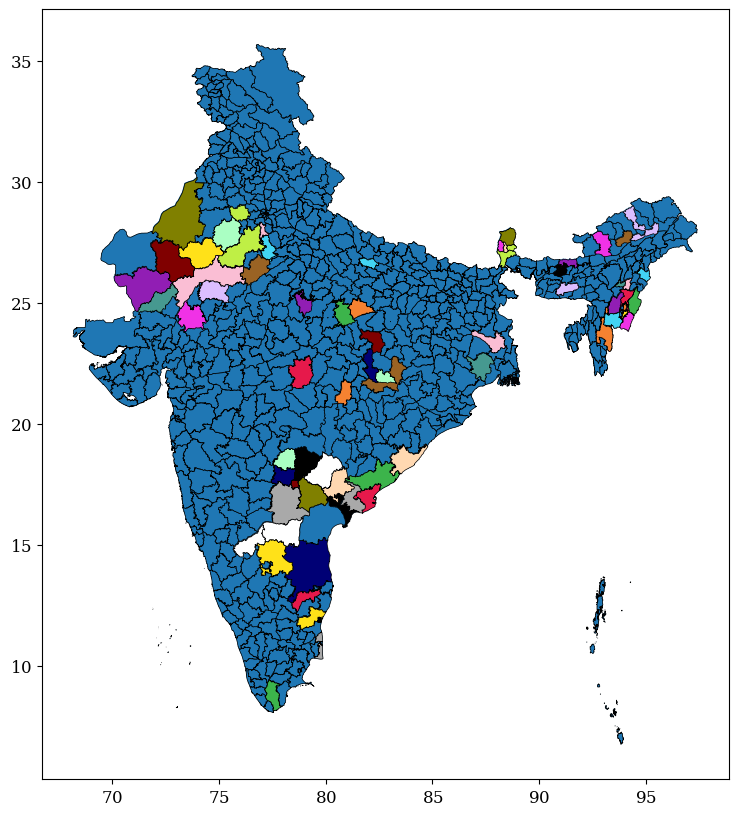

In [81]:
ax = merged_districts.plot(figsize=(10,10))
for group, color in color_dict.items():
    merged_districts[merged_districts['group_number'] == group].plot(
        ax=ax,
        color=color,
        edgecolor='black',
        linewidth=0.5,
        label=group
    )


In [82]:
merged_districts['combined']

0      False
1      False
2      False
3      False
4      False
       ...  
671     True
672     True
673     True
674     True
675     True
Name: combined, Length: 676, dtype: bool

In [83]:
len(ag_stats[ag_stats['Year'] == 2016]['Admin 2'].unique())

688

In [84]:
merged_districts['multidistrict'].value_counts()

multidistrict
 0.0    660
 1.0     12
-1.0      4
Name: count, dtype: int64

In [86]:
merged_districts.to_file('../shapefiles/2016_2023_hybrid_boundary_071925.shp')

/var/folders/16/y9h7_0ld1418y9zts1sf_3xh0000gn/T/ipykernel_16408/3576287895.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_districts.to_file('../shapefiles/2016_2023_hybrid_boundary_071925.shp')
/Users/michaelfoley/miniforge3/envs/pygeo/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'merged_districts' to 'merged_dis'
  ogr_write(
/Users/michaelfoley/miniforge3/envs/pygeo/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'group_number' to 'group_numb'
  ogr_write(
/Users/michaelfoley/miniforge3/envs/pygeo/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'multidistrict' to 'multidistr'
  ogr_write(
/Users/michaelfoley/miniforge3/envs/pygeo/lib/python3.13/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'change_year' to 'change_yea'
  ogr_writ

# Sweet!! Now we just need to restructure the file so that it is easy to use

I think what we should do is create a list of names for each year that should be loaded in alongside the hybrid boundary. You should be able to pass data and a year (or set of years) to a single function, and this function should create an aggregate dataset for that year (or set of years).

In [87]:
merged_districts['STATE'].unique()

array(['HIMACHAL PRADESH', 'UTTARAKHAND', 'TAMIL NADU', 'WEST BENGAL',
       'BIHAR', 'LADAKH', 'ASSAM', 'RAJASTHAN', 'UTTAR PRADESH', 'KERALA',
       'PUDUCHERRY', 'DELHI', 'HARYANA', 'JAMMU AND KASHMIR', 'PUNJAB',
       'MADHYA PRADESH', 'GUJARAT', 'DADRA & NAGAR HAVELI & DAMAN & DIU',
       'JHARKHAND', 'CHHATTISGARH', 'ODISHA', 'MAHARASHTRA', 'GOA',
       'KARNATAKA', 'TRIPURA', 'ARUNACHAL PRADESH', 'MEGHALAYA',
       'MANIPUR', 'NAGALAND', 'MIZORAM', 'ANDAMAN & NICOBAR',
       'CHANDIGARH', 'LAKSHADWEEP', 'ANDHRA PRADESH', 'SIKKIM',
       'TELANGANA'], dtype=object)

In [88]:
hybrid['STATE'].unique()

array(['HIMACHAL PRADESH', 'UTTARAKHAND', 'TAMIL NADU', 'WEST BENGAL',
       'BIHAR', 'LADAKH', 'ASSAM', 'SIKKIM', 'RAJASTHAN', 'UTTAR PRADESH',
       'KERALA', 'PUDUCHERRY', 'DELHI', 'HARYANA', 'JAMMU AND KASHMIR',
       'PUNJAB', 'MADHYA PRADESH', 'GUJARAT',
       'DADRA & NAGAR HAVELI & DAMAN & DIU', 'JHARKHAND', 'CHHATTISGARH',
       'ODISHA', 'MAHARASHTRA', 'GOA', 'KARNATAKA', 'ANDHRA PRADESH',
       'TELANGANA', 'TRIPURA', 'ARUNACHAL PRADESH', 'MEGHALAYA',
       'MANIPUR', 'NAGALAND', 'MIZORAM', 'ANDAMAN & NICOBAR',
       'CHANDIGARH', 'LAKSHADWEEP'], dtype=object)

In [89]:
hybrid['STATE'].value_counts()

STATE
UTTAR PRADESH                         76
MADHYA PRADESH                        55
RAJASTHAN                             50
TAMIL NADU                            38
BIHAR                                 38
MAHARASHTRA                           36
ASSAM                                 35
GUJARAT                               33
CHHATTISGARH                          33
TELANGANA                             33
KARNATAKA                             31
ODISHA                                30
ANDHRA PRADESH                        26
ARUNACHAL PRADESH                     25
JHARKHAND                             24
WEST BENGAL                           23
PUNJAB                                23
HARYANA                               22
JAMMU AND KASHMIR                     20
MANIPUR                               16
NAGALAND                              16
KERALA                                14
UTTARAKHAND                           13
MEGHALAYA                             12
HIMACHAL P

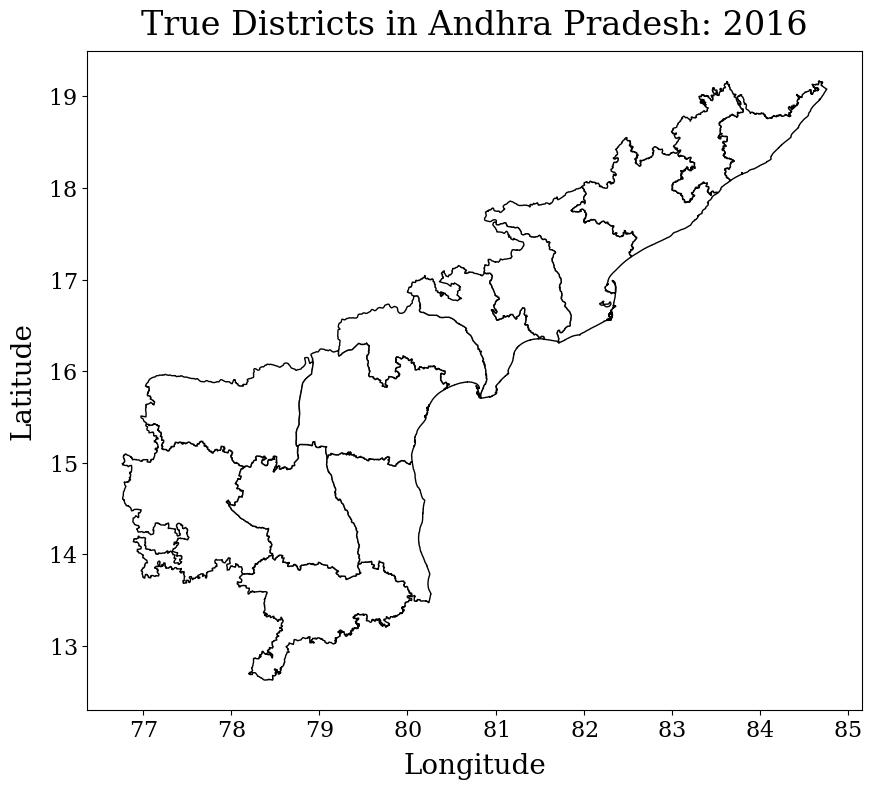

In [90]:
india_boundaries[india_boundaries['STATE'] == 'ANDHRA PRADESH'].to_crs(epsg=4326).plot(
    figsize=(10,10), color='white', edgecolor='black', linewidth=1.0)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('True Districts in Andhra Pradesh: 2016', fontsize=24)
plt.savefig('../plots/TrueDistrictsAndhraPradesh2016.png', dpi=300, bbox_inches='tight')

In [91]:
620+6133+130+1225+5856+57+18883+196+21+60561+44+74711

168437

In [92]:
merged_districts

,id,boundary,name,wikidata,wikipedia,geometry,STATE,name_state,merged_districts,combined,group_number,multidistrict,change_year
0,726993,administrative,Lahaul and Spiti,Q837595,en:Lahaul and Spiti district,"POLYGON ((76.3713 32.80479, 76.3718 32.81253, ...",HIMACHAL PRADESH,Lahaul and Spiti (HP),,False,0.0,0.0,0.0
1,728093,administrative,Kinnaur,Q1862950,en:Kinnaur district,"POLYGON ((77.74825 31.71353, 77.75089 31.71643...",HIMACHAL PRADESH,Kinnaur (HP),,False,0.0,0.0,0.0
2,728111,administrative,Kullu,Q2980880,en:Kullu district,"POLYGON ((76.93577 32.09072, 76.9358 32.09486,...",HIMACHAL PRADESH,Kullu (HP),,False,0.0,0.0,0.0
3,728141,administrative,Chamba,Q1060614,hi:चंबा जिला,"POLYGON ((75.79671 32.88423, 75.79928 32.88556...",HIMACHAL PRADESH,Chamba (HP),,False,0.0,0.0,0.0
4,728149,administrative,Kangra,Q727232,en:Kangra district,"POLYGON ((75.59401 32.07734, 75.5954 32.08443,...",HIMACHAL PRADESH,Kangra (HP),,False,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,4055745,administrative,Tamenglong,Q2301717,en:Tamenglong district,"POLYGON ((93.17167 24.52091, 93.17245 24.5226,...",MANIPUR,Tamenglong (MN),"Noney (MN), Tamenglong (MN)",True,75.0,0.0,2016.0
672,4055741,administrative,Churachandpur,Q2577281,en:Churachandpur district,"POLYGON ((93.3966 24.57814, 93.44967 24.54201,...",MANIPUR,Churachandpur (MN),"Churachandpur (MN), Pherzawl (MN)",True,76.0,0.0,2016.0
673,4055941,administrative,Chandel,Q2301769,en:Chandel district,"POLYGON ((93.74015 24.01521, 93.74113 24.01584...",MANIPUR,Chandel (MN),"Chandel (MN), Tengnoupal (MN)",True,77.0,0.0,2016.0
674,3885955,administrative,Bhiwani,Q1852857,en:Bhiwani district,"POLYGON ((76.33312 28.81269, 76.33367 28.81163...",HARYANA,Bhiwani (HR),"Bhiwani (HR), Charkhi Dadri (HR)",True,78.0,0.0,2016.0


In [95]:
example1_merged = ['Guntur']
example2_merged = ['Visakhapatnam']

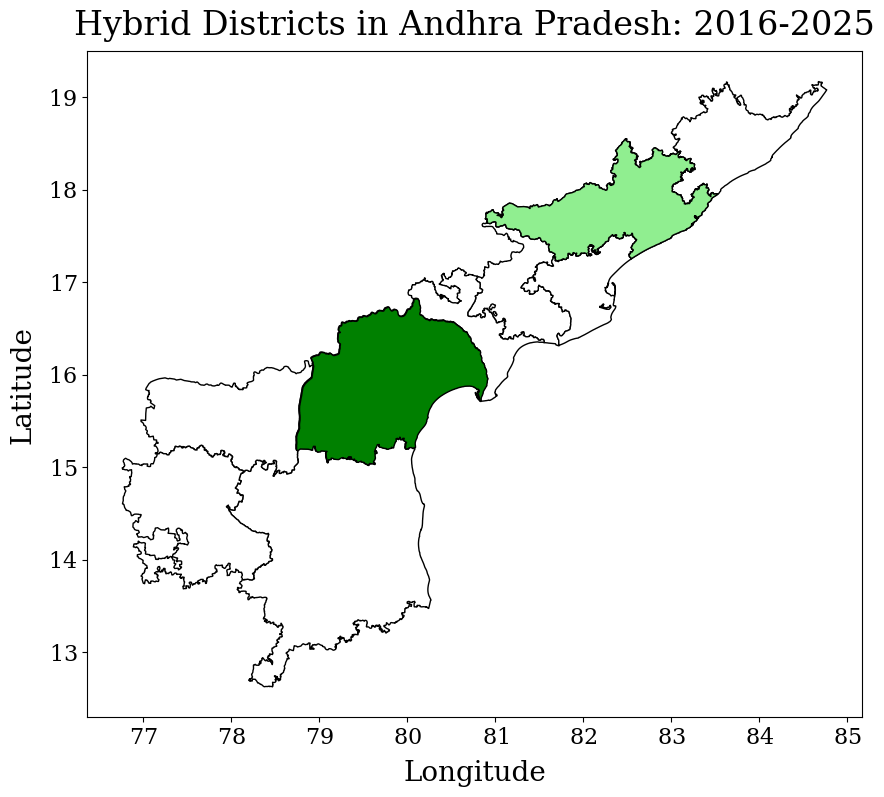

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_districts[merged_districts['STATE'] == 'ANDHRA PRADESH'].plot(ax=ax, figsize=(10,10),
                                                                     color='white', edgecolor='black', linewidth=1.0)
merged_districts[(merged_districts['STATE'] == 'ANDHRA PRADESH') & (merged_districts['name'].isin(example1_merged))].plot(ax=ax, 
                                                                                                                   color='green', edgecolor='black', linewidth=1.0)
merged_districts[(merged_districts['STATE'] == 'ANDHRA PRADESH') & (merged_districts['name'].isin(example2_merged))].plot(ax=ax, 
                                                                                                                   color='lightgreen', edgecolor='black', linewidth=1.0)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.title('Hybrid Districts in Andhra Pradesh: 2016-2025', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('../plots/HybridDistrictsAndhraPradesh2016.png', dpi=300, bbox_inches='tight')

In [98]:
example1 = ['Bapatla', 'Palnadu', 'Prakasam', 'Guntur']
example2 = ['Alluri Sitharama Raju', 'Anakapalli', 'Visakhapatnam']

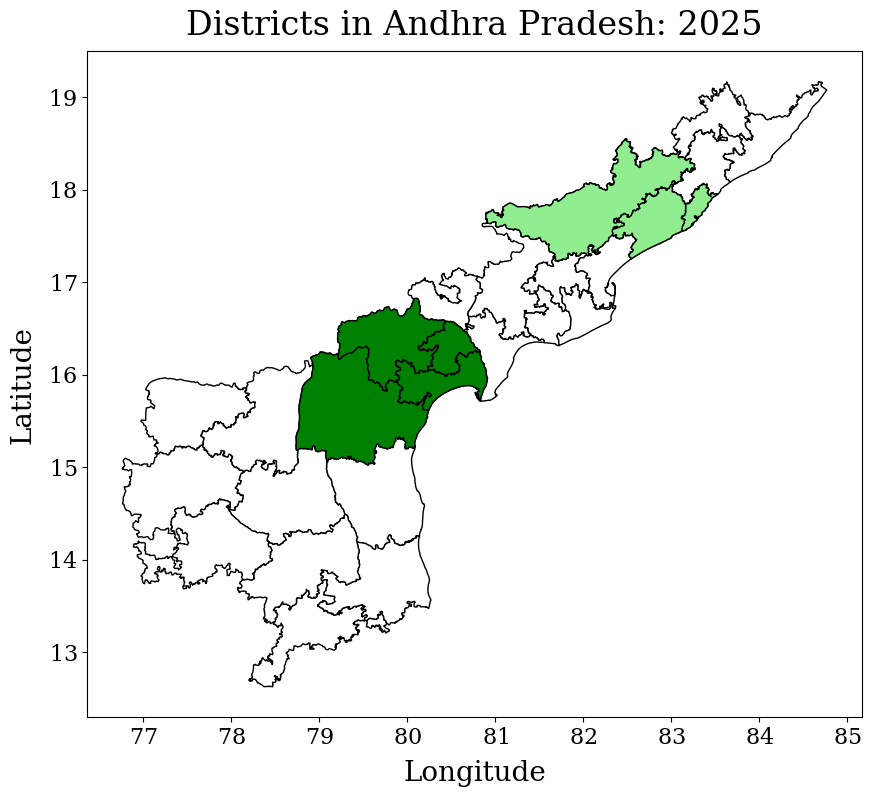

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
hybrid[hybrid['STATE'] == 'ANDHRA PRADESH'].plot(ax=ax, figsize=(10,10),
                                                  color='white', edgecolor='black', linewidth=1.0)
hybrid[(hybrid['STATE'] == 'ANDHRA PRADESH') & (hybrid['name'].isin(example1))].plot(ax=ax, figsize=(10,10),
                                                  color='green', edgecolor='black', linewidth=1.0)
hybrid[(hybrid['STATE'] == 'ANDHRA PRADESH') & (hybrid['name'].isin(example2))].plot(ax=ax, figsize=(10,10),
                                                  color='lightgreen', edgecolor='black', linewidth=1.0)

plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.title('Districts in Andhra Pradesh: 2025', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('../plots/TrueDistrictsAndhraPradesh2025.png', dpi=300, bbox_inches='tight')

In [100]:
# Example names
# Bapatla, Palnadu, Prakasam, Gunter all combine 
# Alluri Sitharam Raju, Anakapalli, Viskhapatnam all combine

In [101]:
hybrid[hybrid['STATE'] == 'ANDHRA PRADESH']['name']

453                      Srikakulam
454                    Vizianagaram
455                   Visakhapatnam
456                   East Godavari
457                   West Godavari
459                         Krishna
466                          Guntur
469                         Kurnool
470                        Prakasam
471                      YSR Kadapa
472                         Nellore
473                       Anantapur
474                        Chittoor
735                        Tirupati
736                       Annamayya
737                  Sri Sathya Sai
738                         Bapatla
739            Parvathipuram Manyam
740                           Eluru
741           Alluri Sitharama Raju
742    Dr. B. R. Ambedkar Konaseema
743                        Kakinada
744                      Anakapalli
745                         Nandyal
746                     NT Rama Rao
747                         Palnadu
Name: name, dtype: object